<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/WaiterTipsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
figure = px.scatter(data_frame = df, x = 'total_bill', y = 'tip', size = 'size', color = 'day', trendline = 'ols')
figure

In [4]:
max_tip = max(df['tip'])
max_tip

10.0

In [5]:
min_tip = min(df['tip'])
min_tip

1.0

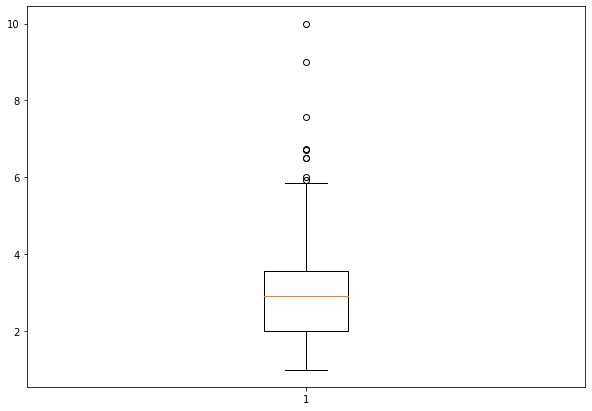

In [6]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df['tip'])
plt.show()

In [7]:
#calculating the modes
import statistics

mode_day = statistics.mode(df['day'])
mode_sex = statistics.mode(df['sex'])
mode_smoker = statistics.mode(df['smoker'])
mode_time = statistics.mode(df['time'])
mode_size = statistics.mode(df['size'])
print(mode_day)
print(mode_sex)
print(mode_smoker)
print(mode_time)
print(mode_size)

Sat
Male
No
Dinner
2


# Data Visualization

In [8]:
fig_day = px.pie(df, values = 'tip', names = 'day', hole = 0.5)
fig_day

In [9]:
fig_sex = px.pie(df, values='tip', names='sex', hole=0.5)
fig_sex

In [10]:
fig_smoker = px.pie(df, values='tip', names='smoker', hole=0.5)
fig_smoker

In [11]:
fig_time = px.pie(df, values='tip', names='time', hole=0.5)
fig_time

In [12]:
#Transforming the categorical values into numerical values:

df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
df['time'] = df['time'].map({'Lunch':0, 'Dinner':1})
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [13]:
x = np.array(df[['total_bill','sex','smoker','day','time','size']])
x

array([[16.99,  0.  ,  0.  ,  3.  ,  1.  ,  2.  ],
       [10.34,  1.  ,  0.  ,  3.  ,  1.  ,  3.  ],
       [21.01,  1.  ,  0.  ,  3.  ,  1.  ,  3.  ],
       ...,
       [22.67,  1.  ,  1.  ,  2.  ,  1.  ,  2.  ],
       [17.82,  1.  ,  0.  ,  2.  ,  1.  ,  2.  ],
       [18.78,  0.  ,  0.  ,  0.  ,  1.  ,  2.  ]])

In [14]:
y = np.array(df['tip'])
y

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.5 ,  3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  2.  ,
        2.  ,  4.3 ,  3.  ,  1.45,  2.5 ,  3.  ,  2.45,  3.27,  3.6 ,
        2.  ,  3.07,  2.31,  5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,
        3.  ,  5.  ,  6.  ,  2.05,  3.  ,  2.5 ,  2.6 ,  5.2 ,  1.56,
        4.34,  3.51,  3.  ,  1.5 ,  1.76,  6.73,  3.21,  2.  ,  1.98,
        3.76,  2.64,  3.15,  2.47,  1.  ,  2.01,  2.09,  1.97,  3.  ,
        3.14,  5.  ,  2.2 ,  1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,
        3.4 ,  1.83,  5.  ,  2.03,  5.17,  2.  ,  4.  ,  5.85,  3.  ,
        3.  ,  3.5 ,  1.  ,  4.3 ,  3.25,  4.73,  4.  ,  1.5 ,  3.  ,
        1.5 ,  2.5 ,  3.  ,  2.5 ,  3.48,  4.08,  1.64,  4.06,  4.29,
        3.76,  4.  ,  3.  ,  1.  ,  4.  ,  2.55,  4.  ,  3.5 ,  5.07,
        1.5 ,  1.8 ,  2.92,  2.31,  1.68,  2.5 ,  2.  ,  2.52,  4.2 ,
        1.48,  2.  ,

In [15]:
#Prediction model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [19]:
#Testing Performance
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[50, 1, 0, 2, 1, 10]])
print('Predicted tips is',*model.predict(features))

Predicted tips is 7.664960506140727


In [25]:
#Testing Performance by taking input from user

Bill = float(input('Enter the total bill: '))
Sex = int(input('Enter 0 for Female and 1 for Male: '))
Smoker = int(input('Enter 0 for No Smoker and 1 for Smoker: '))
Day = int(input('Enter 0 for Thu, 1 for Fri, 2 for Sat and 3 for Sun: '))
Time = int(input('Enter 0 for Lunch and 1 for Dinner: '))
Size = int(input('Enter the table size: '))

Features = [[Bill, Sex, Smoker, Day, Time, Size]] #Double braket means 2D array
print('Predicted tips is $ {:.2f}'.format(*model.predict(Features)))

Enter the total bill: 50
Enter 0 for Female and 1 for Male: 1
Enter 0 for No Smoker and 1 for Smoker: 1
Enter 0 for Thu, 1 for Fri, 2 for Sat and 3 for Sun: 1
Enter 0 for Lunch and 1 for Dinner: 1
Enter the table size: 4
Predicted tips is $ 6.03
